In [0]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [0]:
url='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'


In [0]:
df=pd.read_csv(url, header=None)

In [0]:
df.columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'outcome'
]



In [0]:
df[0:6]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
df.shape

(494021, 42)

In [0]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 2203
buffer_overflow.        30
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.              1247
land.                   21
loadmodule.              9
multihop.                7
neptune.            107201
nmap.                  231
normal.              97278
perl.                    3
phf.                     4
pod.                   264
portsweep.            1040
rootkit.                10
satan.                1589
smurf.              280790
spy.                     2
teardrop.              979
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

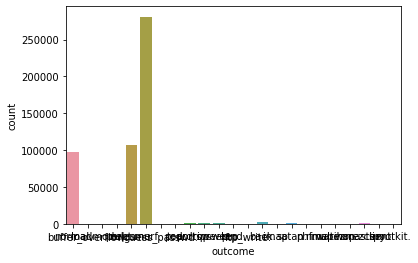

In [0]:
sns.countplot(df.outcome)


In [0]:
df.describe()
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [0]:
df.shape

(494021, 42)

In [0]:
#profile=ProfileReport(df)


In [0]:
#profile

In [0]:
df['categorised']=df['outcome']

In [0]:
df=df.replace(to_replace =["ipsweep.","portsweep.","nmap.","satan."],  
                            value ="probe")
df=df.replace(to_replace =["ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster."],  
                            value ="r2l")
df=df.replace(to_replace =["buffer_overflow.","loadmodule.","perl.", "rootkit."],  
                            value ="u2r")
df=df.replace(to_replace =["back.", "land.","neptune.", "pod.","smurf.","teardrop."],  
                            value ="dos")


In [0]:
df.groupby('categorised')['categorised'].count()

categorised
dos        391458
normal.     97278
probe        4107
r2l          1126
u2r            52
Name: categorised, dtype: int64

In [0]:
uniqueOutcome =df['outcome'].unique()
len(uniqueOutcome)

5

In [0]:
df.groupby('outcome')['outcome'].count()

outcome
dos        391458
normal.     97278
probe        4107
r2l          1126
u2r            52
Name: outcome, dtype: int64

In [0]:
df.shape

(494021, 43)

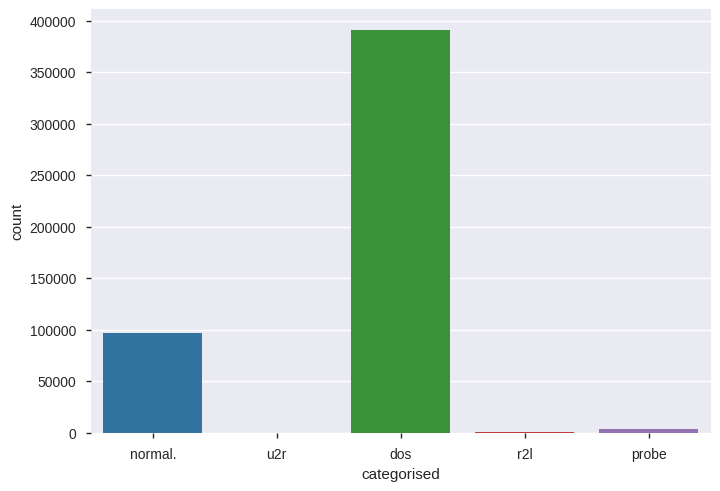

In [0]:
sns.countplot(df.categorised)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [0]:
df['categorised']= label_encoder.fit_transform(df['categorised'])


In [0]:
df['categorised'].unique()

array([1, 4, 0, 3, 2])

In [0]:
df['protocol_type']= label_encoder.fit_transform(df['protocol_type'])
df['service']= label_encoder.fit_transform(df['service'])
df['flag']= label_encoder.fit_transform(df['flag'])

In [0]:
df['protocol_type'].unique()

array([1, 2, 0])

In [0]:
X= df.iloc[:,:-2]
y = df['categorised']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [0]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,categorised
0,0,1,22,9,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,1
1,0,1,22,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,1
2,0,1,22,9,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
3,0,1,22,9,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,1
4,0,1,22,9,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,1
494017,0,1,22,9,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,1
494018,0,1,22,9,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,1
494019,0,1,22,9,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,1


## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
clf=RandomForestClassifier(n_estimators=10)

clf.fit(X_train,y_train)
end_time = time.time()
print(end_time-start_time)

2.27999210357666


In [0]:
start_time = time.time()
y_pred=clf.predict(X_test)

y_pred
end_time = time.time()
print(end_time-start_time)

0.12368535995483398


In [0]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9996255250240372


In [0]:
from sklearn.metrics import confusion_matrix
labels = [0,1,2,3,4]
conf_mat = confusion_matrix(y_test, y_pred,labels=[0,1,2,3,4])
print(conf_mat)

[[78335     1     0     0     0]
 [    1 19414     1     2     1]
 [    0     9   786     0     0]
 [    1    11     1   229     1]
 [    0     6     1     1     4]]


In [0]:
from sklearn import metrics

report =  metrics.classification_report(y_test,y_pred)

# precision = report['precision'].mean()
print(type(report))
print(metrics.classification_report(y_test,y_pred))

print(metrics.cohen_kappa_score(y_test,y_pred))

<class 'str'>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78336
           1       1.00      1.00      1.00     19419
           2       1.00      0.99      0.99       795
           3       0.99      0.94      0.96       243
           4       0.67      0.33      0.44        12

    accuracy                           1.00     98805
   macro avg       0.93      0.85      0.88     98805
weighted avg       1.00      1.00      1.00     98805

0.9988743160667246


## KNN Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier


In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

In [0]:
import time
start_time = time.time()
knn.fit(X_train,y_train)
end_time = time.time()
print(end_time-start_time)

135.49949550628662


In [0]:
prediction = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(confusion_matrix(y_test,prediction))

[[78326     8     2     0     0]
 [   12 19400     5     2     0]
 [   31    17   747     0     0]
 [    1     9     0   233     0]
 [    0     8     0     0     4]]


In [0]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78336
           1       1.00      1.00      1.00     19419
           2       0.99      0.94      0.96       795
           3       0.99      0.96      0.97       243
           4       1.00      0.33      0.50        12

    accuracy                           1.00     98805
   macro avg       1.00      0.85      0.89     98805
weighted avg       1.00      1.00      1.00     98805



In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9996255250240372


In [0]:
# error_rate=[]
# for i in range(1,41):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     prediction = knn.predict(X_test)
#     error_rate.append(np.mean(prediction!=y_test))

## SVM Classifier

In [0]:
from sklearn.svm import SVC

In [0]:
model = SVC()

In [0]:
model.fit(X_train,y_train)

In [0]:
predictions = model.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions))


KDD’99 has been the most wildly used
data set for the evaluation of anomaly detection methods.

The simulated attacks fall in one of the
following four categories:

1) Denial of Service Attack (DoS): is an attack in
which the attacker makes some computing or memory
resource too busy or too full to handle legitimate requests, or denies legitimate users access to a machine.

2) User to Root Attack (U2R): is a class of exploit in
which the attacker starts out with access to a normal
user account on the system (perhaps gained by sniffing
passwords, a dictionary attack, or social engineering)
and is able to exploit some vulnerability to gain root
access to the system.

3) Remote to Local Attack (R2L): occurs when an
attacker who has the ability to send packets to a
machine over a network but who does not have an
account on that machine exploits some vulnerability to
gain local access as a user of that machine.

4) Probing Attack: is an attempt to gather information
about a network of computers for the apparent purpose
of circumventing its security controls.